Logistic Regression:
Accuracy: 0.4816666666666667
Confusion Matrix:
 [[189 210]
 [101 100]]
ROC-AUC Score: 0.4623623735956808

Linear Discriminant Analysis (LDA):
Accuracy: 0.665
Confusion Matrix:
 [[399   0]
 [201   0]]
ROC-AUC Score: 0.4625120013965261


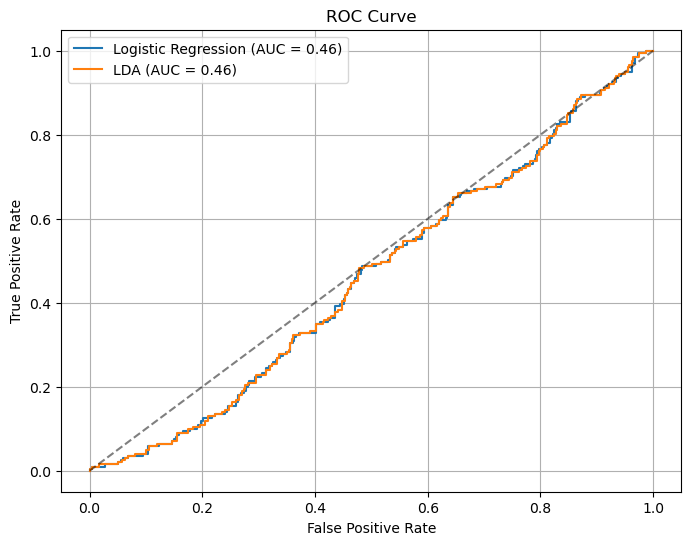

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df =pd.read_csv("//home//vinayak-s//Downloads//mental_health_workplace_survey.csv")

features = [
    'Age', 'WorkHoursPerWeek', 'StressLevel', 'SleepHours',
    'ManagerSupportScore', 'WorkLifeBalanceScore', 'CareerGrowthScore'
]
target = 'BurnoutRisk'

df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:, 1]

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
y_prob_lda = lda.predict_proba(X_test)[:, 1]

acc_log = accuracy_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_prob_log)

acc_lda = accuracy_score(y_test, y_pred_lda)
cm_lda = confusion_matrix(y_test, y_pred_lda)
roc_auc_lda = roc_auc_score(y_test, y_prob_lda)

print("Logistic Regression:")
print("Accuracy:", acc_log)
print("Confusion Matrix:\n", cm_log)
print("ROC-AUC Score:", roc_auc_log)

print("\nLinear Discriminant Analysis (LDA):")
print("Accuracy:", acc_lda)
print("Confusion Matrix:\n", cm_lda)
print("ROC-AUC Score:", roc_auc_lda)

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
